In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.svm import LinearSVR
import xgboost as xgb

In [2]:
# load and split the data
df = pd.read_csv(r'C:\Users\vveku\Desktop\graduate-admission-dataset-master\Admission_Predict_Ver1.1.csv')

In [3]:
# refining the features names to avoid any sort of column name errors 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
# dropping the serial number (insignificant feature)
df.drop(columns=['serial_no.'], axis=1, inplace=True)
print(list(df.columns.values))

['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']


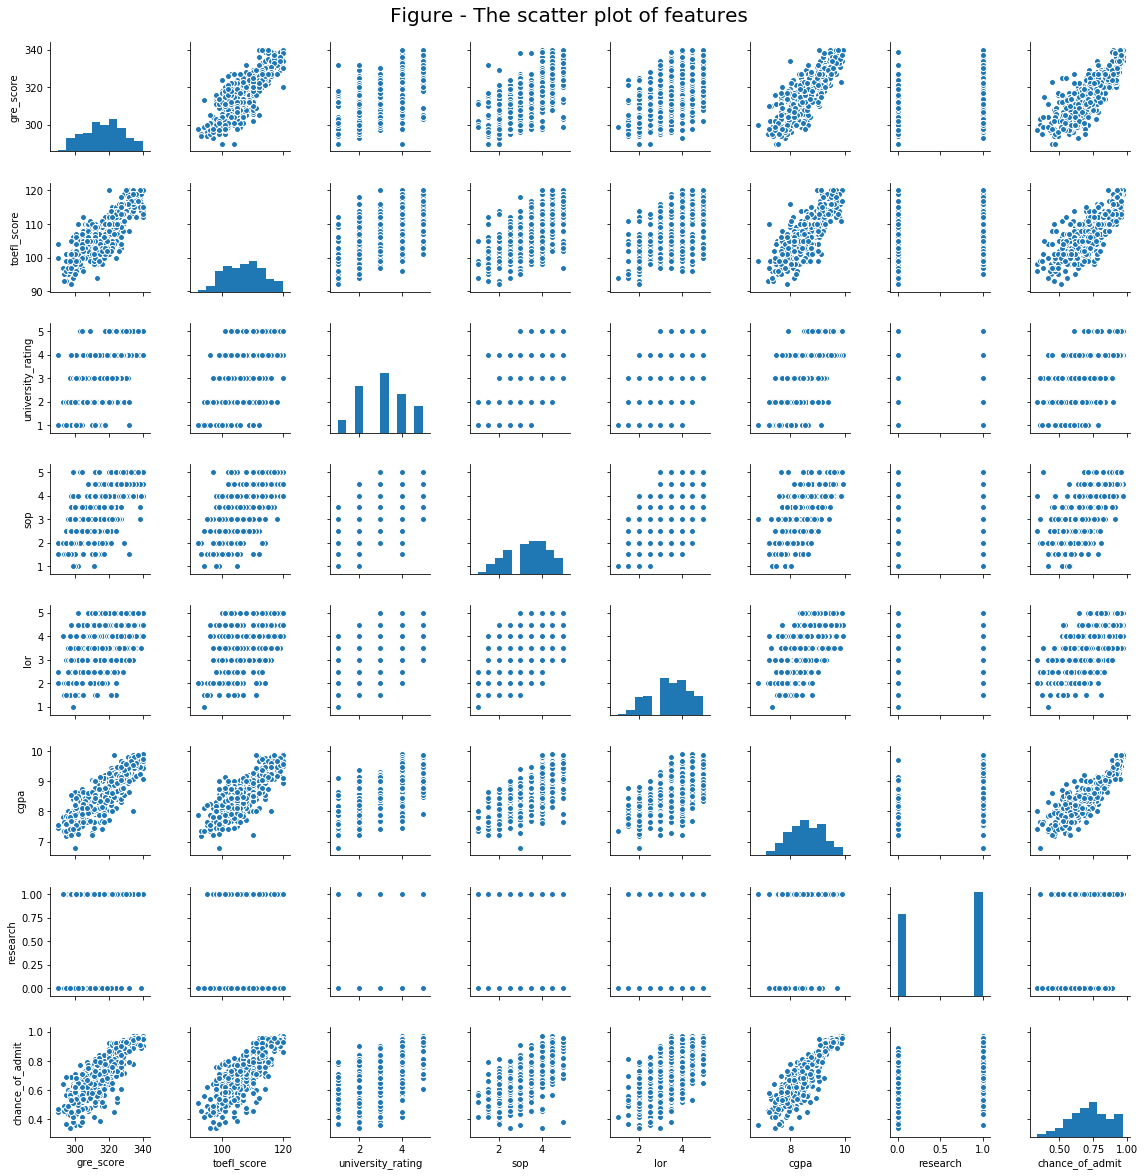

In [5]:
# scatter plot of the features
cols = list(df.columns.values)
sns.pairplot(df[cols], size = 2)
plt.suptitle('Figure - The scatter plot of features ', x=0.5, y=1.01, verticalalignment='center', fontsize= 20)
plt.tight_layout()
plt.show();

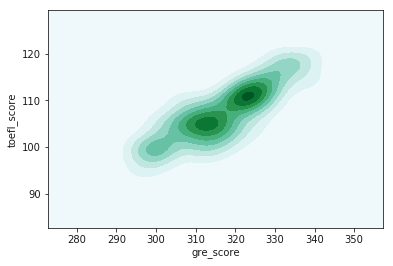

In [6]:
sns.set_color_codes("pastel")
sns.kdeplot(df['gre_score'], df['toefl_score'], shade=True, cut=5)

In [7]:
# printing the columns' information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null int64
chance_of_admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [8]:
# checking for any NaN value in dataset
df.isnull().values.any()

False

In [9]:
# finding the significant features for predicting chances of admit
pd.DataFrame(df.corr()['chance_of_admit'])

,chance_of_admit
gre_score,0.810351
toefl_score,0.792228
university_rating,0.690132
sop,0.684137
lor,0.645365
cgpa,0.882413
research,0.545871
chance_of_admit,1.000000


As we can see that, GRE score, TOEFL score and CGPA are top 3 features which can be useful to decide the output.

In [10]:
# creating features and labels
y = df['chance_of_admit']
x = df

# Linear regression

1. Using data normalization

In [11]:
scaler = Normalizer().fit(x)
rescaledX = scaler.transform(x)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (375, 8)
X test:  (125, 8)
y train:  (375,)
y test:  (125,)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = lr.predict(X_test)
nlr = round(100*lr.score(X_test, y_test),3)
print('Score: ', nlr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  97.959
Mean-squared error:  0.00039841058208813987


2. Using min-max scaling

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (375, 8)
X test:  (125, 8)
y train:  (375,)
y test:  (125,)


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_pred = lr.predict(X_test)
mmlr = round(100*lr.score(X_test, y_test),3)
print('Score: ', mmlr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  100.0
Mean-squared error:  4.5852540115971314e-32


3. Using data Standardization

In [19]:
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (375, 8)
X test:  (125, 8)
y train:  (375,)
y test:  (125,)


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_pred = lr.predict(X_test)
slr = round(100*lr.score(X_test, y_test),3)
print('Score: ', slr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  100.0
Mean-squared error:  1.6541427106353092e-32


# XGBoost classifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (375, 8)
X test:  (125, 8)
y train:  (375,)
y test:  (125,)


In [24]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [26]:
y_pred = model.predict(X_test)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))
xgbc = round(100*r2_score(y_test, y_pred),2)
print('R2 score for regression: ', xgbc)

Mean-squared error:  1.040000000000002e-05
R2 score for regression:  99.95


C:\Users\vveku\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Ridge regression classifier

In [27]:
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (375, 8)
X test:  (125, 8)
y train:  (375,)
y test:  (125,)


In [29]:
model = Ridge(alpha=0.5)
model.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y_pred = model.predict(X_test)
rrc = round(100*model.score(X_test, y_test),3)
print('Score: ', rrc)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  99.999
Mean-squared error:  1.959326272773728e-07


# Lasso regression (least absolute shrinkage and selection operator)

In [31]:
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (375, 8)
X test:  (125, 8)
y train:  (375,)
y test:  (125,)


In [33]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
y_pred = model.predict(X_test)
lrc = round(100*model.score(X_test, y_test),3)
print('Score: ', lrc)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  99.501
Mean-squared error:  9.74685185456675e-05


# Stochastic gradient descent (SGD)

In [35]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [37]:
sgd_reg = SGDRegressor(max_iter=50)
sgd_reg.fit(X_train_standard, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [38]:
y_pred = sgd_reg.predict(X_test_standard)
sgdc = round(100*sgd_reg.score(X_test_standard, y_test),2)
print('Score: ', sgdc)

Score:  99.97


# Random forest

In [39]:
rfr = RandomForestRegressor(n_estimators=100,criterion='mse')
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
y_pred = rfr.predict(X_test)
rfrc = round(100*rfr.score(X_test,y_test),2)
print('Score: ', rfrc)

Score:  99.97


# Multi-layer perceptron regressor (MLP)

In [41]:
mlp = MLPRegressor(hidden_layer_sizes=(100,),activation='relu',solver='lbfgs',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.5,random_state=15)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=15, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [42]:
y_pred = mlp.predict(X_test)
mlpr = round(100*mlp.score(X_test, y_test),2)
print('Score: ', mlpr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  99.93
Mean-squared error:  1.4320647341007553e-05


# Analysing the best algorithm

In [43]:
algos = ['Normalised Linear Regression', 'Min-max scaling Linear Regression', 'Data standardization Linear Regression', 'XGBoost classifier', 'Ridge regression', 'Lasso regression', 'Stochastic gradient descent', 'Random Forest regressor', 'Multi-layer perceptron regressor']
score = [nlr, mmlr, slr, xgbc, rrc, lrc, sgdc, rfrc, mlpr]

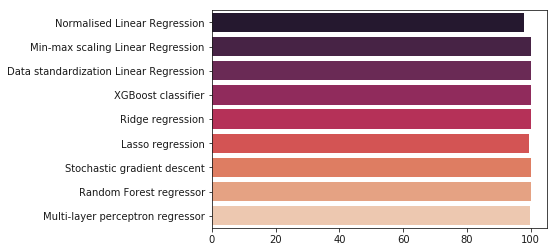

In [44]:
import matplotlib.pyplot as plt

sns.barplot(score, np.array(algos), palette="rocket")

plt.show()